## Домашнее задание к занятию №6 от 23.11.2019 г. «MapReduce расширенная версия»
ФИО: Кривова Татьяна Сергеевна

**1. Установка PySpark.**

In [0]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

In [0]:
!wget -q www-us.apache.org/dist/spark/spark-2.4.4/spark-2.4.4-bin-hadoop2.7.tgz

In [3]:
!tar -xvf spark-2.4.4-bin-hadoop2.7.tgz

spark-2.4.4-bin-hadoop2.7/
spark-2.4.4-bin-hadoop2.7/R/
spark-2.4.4-bin-hadoop2.7/R/lib/
spark-2.4.4-bin-hadoop2.7/R/lib/sparkr.zip
spark-2.4.4-bin-hadoop2.7/R/lib/SparkR/
spark-2.4.4-bin-hadoop2.7/R/lib/SparkR/INDEX
spark-2.4.4-bin-hadoop2.7/R/lib/SparkR/html/
spark-2.4.4-bin-hadoop2.7/R/lib/SparkR/html/R.css
spark-2.4.4-bin-hadoop2.7/R/lib/SparkR/html/00Index.html
spark-2.4.4-bin-hadoop2.7/R/lib/SparkR/help/
spark-2.4.4-bin-hadoop2.7/R/lib/SparkR/help/aliases.rds
spark-2.4.4-bin-hadoop2.7/R/lib/SparkR/help/AnIndex
spark-2.4.4-bin-hadoop2.7/R/lib/SparkR/help/SparkR.rdx
spark-2.4.4-bin-hadoop2.7/R/lib/SparkR/help/SparkR.rdb
spark-2.4.4-bin-hadoop2.7/R/lib/SparkR/help/paths.rds
spark-2.4.4-bin-hadoop2.7/R/lib/SparkR/worker/
spark-2.4.4-bin-hadoop2.7/R/lib/SparkR/worker/worker.R
spark-2.4.4-bin-hadoop2.7/R/lib/SparkR/worker/daemon.R
spark-2.4.4-bin-hadoop2.7/R/lib/SparkR/tests/
spark-2.4.4-bin-hadoop2.7/R/lib/SparkR/tests/testthat/
spark-2.4.4-bin-hadoop2.7/R/lib/SparkR/tests/testthat/te

In [0]:
!pip install -q findspark

In [0]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-2.4.4-bin-hadoop2.7"

In [0]:
import findspark
findspark.init()
from pyspark.sql import SparkSession

spark = SparkSession.builder.master("local[*]").getOrCreate()

**2. Скачайте dataset iris:** https://gist.github.com/netj/8836201

In [0]:
hw_iris = spark.read.csv('iris.csv', inferSchema=True, header=True)

In [8]:
hw_iris.dtypes

[('sepal.length', 'double'),
 ('sepal.width', 'double'),
 ('petal.length', 'double'),
 ('petal.width', 'double'),
 ('variety', 'string')]

In [9]:
hw_iris.show(10)

+------------+-----------+------------+-----------+-------+
|sepal.length|sepal.width|petal.length|petal.width|variety|
+------------+-----------+------------+-----------+-------+
|         5.1|        3.5|         1.4|        0.2| Setosa|
|         4.9|        3.0|         1.4|        0.2| Setosa|
|         4.7|        3.2|         1.3|        0.2| Setosa|
|         4.6|        3.1|         1.5|        0.2| Setosa|
|         5.0|        3.6|         1.4|        0.2| Setosa|
|         5.4|        3.9|         1.7|        0.4| Setosa|
|         4.6|        3.4|         1.4|        0.3| Setosa|
|         5.0|        3.4|         1.5|        0.2| Setosa|
|         4.4|        2.9|         1.4|        0.2| Setosa|
|         4.9|        3.1|         1.5|        0.1| Setosa|
+------------+-----------+------------+-----------+-------+
only showing top 10 rows



**3. Для каждого типа цветка определите максимальное, минимальное и среднее значение 4-х параметров.**

In [10]:
hw_iris.select('variety').distinct().show() # уникальные классы цветков

+----------+
|   variety|
+----------+
| Virginica|
|    Setosa|
|Versicolor|
+----------+



In [11]:
# переименуем столбцы, заменив точку . на нижнее подчеркивание _
hw_iris = hw_iris.withColumnRenamed('sepal.length', 'sepal_length').withColumnRenamed('sepal.width', 'sepal_width').withColumnRenamed('petal.length', 'petal_length').withColumnRenamed('petal.width', 'petal_width')
hw_iris.show(5)

+------------+-----------+------------+-----------+-------+
|sepal_length|sepal_width|petal_length|petal_width|variety|
+------------+-----------+------------+-----------+-------+
|         5.1|        3.5|         1.4|        0.2| Setosa|
|         4.9|        3.0|         1.4|        0.2| Setosa|
|         4.7|        3.2|         1.3|        0.2| Setosa|
|         4.6|        3.1|         1.5|        0.2| Setosa|
|         5.0|        3.6|         1.4|        0.2| Setosa|
+------------+-----------+------------+-----------+-------+
only showing top 5 rows



In [12]:
# для типа цветка Virginica
virg_data = hw_iris[hw_iris.variety == 'Virginica'].describe('sepal_length', 'sepal_width', 'petal_length', 'petal_width')
virg_data = virg_data.where((virg_data['summary'] == 'mean') | (virg_data['summary'] == 'min') | (virg_data['summary'] == 'max'))

virg_data.show()

+-------+-----------------+------------------+------------+-----------+
|summary|     sepal_length|       sepal_width|petal_length|petal_width|
+-------+-----------------+------------------+------------+-----------+
|   mean|6.587999999999998|2.9739999999999998|       5.552|      2.026|
|    min|              4.9|               2.2|         4.5|        1.4|
|    max|              7.9|               3.8|         6.9|        2.5|
+-------+-----------------+------------------+------------+-----------+



In [13]:
# для типа цветка Setosa
seto_data = hw_iris[hw_iris.variety == 'Setosa'].describe('sepal_length', 'sepal_width', 'petal_length', 'petal_width')
seto_data = seto_data.where((seto_data['summary'] == 'mean') | (seto_data['summary'] == 'min') | (seto_data['summary'] == 'max'))

seto_data.show()

+-------+-----------------+-----------------+------------------+------------------+
|summary|     sepal_length|      sepal_width|      petal_length|       petal_width|
+-------+-----------------+-----------------+------------------+------------------+
|   mean|5.005999999999999|3.428000000000001|1.4620000000000002|0.2459999999999999|
|    min|              4.3|              2.3|               1.0|               0.1|
|    max|              5.8|              4.4|               1.9|               0.6|
+-------+-----------------+-----------------+------------------+------------------+



In [14]:
# для типа цветка Versicolor
vers_data = hw_iris[hw_iris.variety == 'Versicolor'].describe('sepal_length', 'sepal_width', 'petal_length', 'petal_width')
vers_data = vers_data.where((vers_data['summary'] == 'mean') | (vers_data['summary'] == 'min') | (vers_data['summary'] == 'max'))

vers_data.show()

+-------+------------+------------------+------------+------------------+
|summary|sepal_length|       sepal_width|petal_length|       petal_width|
+-------+------------+------------------+------------+------------------+
|   mean|       5.936|2.7700000000000005|        4.26|1.3259999999999998|
|    min|         4.9|               2.0|         3.0|               1.0|
|    max|         7.0|               3.4|         5.1|               1.8|
+-------+------------+------------------+------------+------------------+



**4. Визуализируйте точечный график (plt.scatter) по каждой паре параметров.**

In [0]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
df_graph = hw_iris.toPandas()

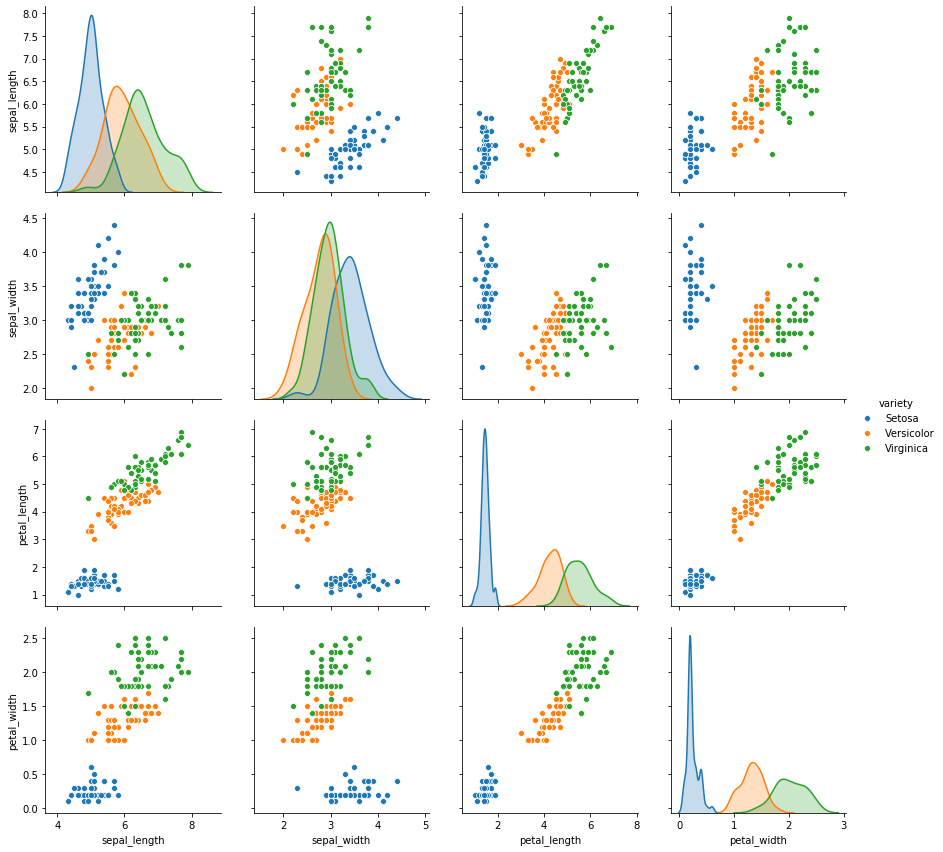

In [17]:
sns.pairplot(data=df_graph, height=3, hue='variety')

Text(0, 0.5, 'Versicolor: petal_width')

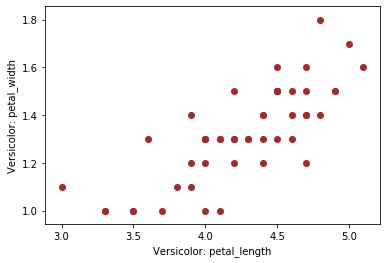

In [18]:
# дополнительно визуализируем для Versicolor
df_vers = df_graph[df_graph.variety == 'Versicolor']

plt.scatter(df_vers.petal_length, df_vers.petal_width, c='brown')
plt.xlabel('Versicolor: petal_length')
plt.ylabel('Versicolor: petal_width')

**5. Попробуйте отделить какой-нить тип цветка от всех остальных** (сформулируйте правило на основе диаграммы - ЕСЛИ ЗНАЧЕНИЕ ПАРАМЕТРА X БОЛЬШЕ/МЕНЬШЕ Y, ТО ЦВЕТОК СКОРЕЕ ВСЕГО ОТНОСИТСЯ/НЕ ОТНОСИТСЯ К ТИПУ Z)

In [0]:
# для Versicolor: (1 <= petal_width <=1.8) and (3 <= petal_length <= 5.1)

**6. Сделайте отдельную колонку для своего предсказания.**

In [0]:
from pyspark.sql import functions as F

In [0]:
# добавляю стобец is_Versicolor с правильными ответами
hw_iris = hw_iris.withColumn('is_Versicolor', F.when(F.col('variety') == 'Versicolor', '1').otherwise(0))

In [0]:
# добавляю стобец prediction по выбранным условиям
hw_iris = hw_iris.withColumn('prediction', F.when((F.col('petal_width') >= 1) & (F.col('petal_width') <= 1.8) &
                                                  (F.col('petal_length') >= 3) & (F.col('petal_length') <= 5.1), '1').otherwise(0))

**7. Оцените качество** (сколько раз Вы угадали с ответом и сколько раз не угадали)

In [0]:
hw_iris = hw_iris.withColumn('check_correctness', F.when(((F.col('is_Versicolor') == 1) & (F.col('prediction') == 1)) |
                                                         ((F.col('is_Versicolor') == 0) & (F.col('prediction') == 0)), 'Correct').otherwise('Error'))

In [24]:
hw_iris.show(60)

+------------+-----------+------------+-----------+----------+-------------+----------+-----------------+
|sepal_length|sepal_width|petal_length|petal_width|   variety|is_Versicolor|prediction|check_correctness|
+------------+-----------+------------+-----------+----------+-------------+----------+-----------------+
|         5.1|        3.5|         1.4|        0.2|    Setosa|            0|         0|          Correct|
|         4.9|        3.0|         1.4|        0.2|    Setosa|            0|         0|          Correct|
|         4.7|        3.2|         1.3|        0.2|    Setosa|            0|         0|          Correct|
|         4.6|        3.1|         1.5|        0.2|    Setosa|            0|         0|          Correct|
|         5.0|        3.6|         1.4|        0.2|    Setosa|            0|         0|          Correct|
|         5.4|        3.9|         1.7|        0.4|    Setosa|            0|         0|          Correct|
|         4.6|        3.4|         1.4|       

In [25]:
hw_iris.groupBy('check_correctness').count().show()

+-----------------+-----+
|check_correctness|count|
+-----------------+-----+
|          Correct|  142|
|            Error|    8|
+-----------------+-----+



In [26]:
hw_iris[hw_iris.check_correctness == 'Error'].show()

+------------+-----------+------------+-----------+---------+-------------+----------+-----------------+
|sepal_length|sepal_width|petal_length|petal_width|  variety|is_Versicolor|prediction|check_correctness|
+------------+-----------+------------+-----------+---------+-------------+----------+-----------------+
|         4.9|        2.5|         4.5|        1.7|Virginica|            0|         1|            Error|
|         6.0|        2.2|         5.0|        1.5|Virginica|            0|         1|            Error|
|         6.3|        2.7|         4.9|        1.8|Virginica|            0|         1|            Error|
|         6.2|        2.8|         4.8|        1.8|Virginica|            0|         1|            Error|
|         6.1|        3.0|         4.9|        1.8|Virginica|            0|         1|            Error|
|         6.3|        2.8|         5.1|        1.5|Virginica|            0|         1|            Error|
|         6.0|        3.0|         4.8|        1.8|Virg